In [1]:
# data : 20240131
# desc : 단순선형회귀

In [2]:
# 패키지 불러오기
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_6804\3635171979.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# 예제 데이터 로드
mydata = pd.read_csv('../data_regression.csv') # 데이터 위치 지정
print(mydata.head()) # 로드 데이터 확인

         TM  CA_TOT  SS_DAY
0  20150101     3.4     7.8
1  20150102     3.1     7.1
2  20150103     3.7     5.8
3  20150104     3.1     6.2
4  20150105     6.5     5.1


In [5]:
# 데이터 정제(일조합 = -0.5 * 전운량 + 오차, 일조합 예측값 = -0.5 * 전운량)
mydata.loc[mydata['SS_DAY'] == -9] # 20150520 일조합 결측치(-9) 확인
mydata.loc[(mydata['SS_DAY'] != -9) & (mydata['CA_TOT'] == 0.5)] # 20150520을 제외한

#일평균전운량이 0.5였던 날들 확인
mydata.loc[mydata['SS_DAY'] == -9, 'SS_DAY'] = 10.7 # 일조합 결측치에 평균값 10.7 입력

# 단순선형회귀 모델링
result = sm.ols(formula='SS_DAY ~ CA_TOT', data=mydata).fit()

In [6]:
# 회귀분석 결과 요약
print(result.summary())

# 세부 분석 결과 확인
print('< Parameters > \n', result.params) # 회귀계수 출력
print('< Prob (Parameters) > \n', result.pvalues) # 회귀계수에 대한 P-value 출력
print('< Adj. R-squaured > \n', result.rsquared_adj) # 조정된 R-squared 출력
print('< Prob (F-statistic) > \n', result.f_pvalue) # 모형의 적합도 출력

                            OLS Regression Results                            
Dep. Variable:                 SS_DAY   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     749.0
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           2.88e-90
Time:                        17:04:55   Log-Likelihood:                -827.45
No. Observations:                 365   AIC:                             1659.
Df Residuals:                     363   BIC:                             1667.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2217      0.238     51.347      0.0

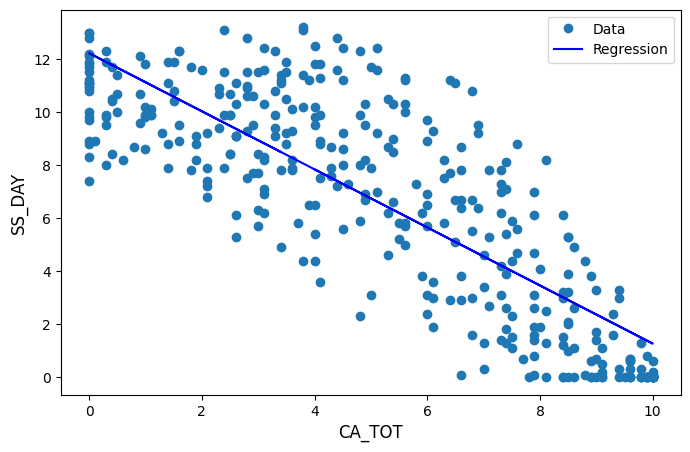

In [7]:
# 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 5))
plt.ylabel('SS_DAY', size=12)
plt.xlabel('CA_TOT', size=12)
ax.plot(mydata.CA_TOT.values, mydata.SS_DAY.values, 'o', label='Data')
ax.plot(mydata.CA_TOT.values, result.fittedvalues, 'b-', label='Regression')
ax.legend(loc='best')
plt.show()